# Adidas Sales

## Table of Contents

### This script contains the following:

#### - Importing your libraries and data
#### - Subsetting, wrangling, and cleaning time-series data
#### - Time series analysis: decomposition
#### - Testing for stationarity
#### - Stationarizing the Adidas Data

### Importing your libraries and data

In [2]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [3]:
# Configure API key 

quandl.ApiConfig.api_key = 'JVCwxdxt6Nts735ZzsAZ'

In [4]:
#Create path
path = r'/Users/rusamijan/04-2023 Adidas Sales Analysis'

In [5]:
#Import data
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ad_cleaned.pkl'))

#drop columns
df_1=df.drop(['Retailer','Retailer ID','Region','State', 'City', 'Product', 'Price per Unit', 'Units Sold', 'Operating Profit', 'Operating Margin','Sales Method'], axis = 1, inplace = True)

df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])

In [6]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,1/1/20,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,50%,In-store
1,Foot Locker,1185732,1/2/20,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,30%,In-store
2,Foot Locker,1185732,1/3/20,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,400000.0,140000.0,35%,In-store
3,Foot Locker,1185732,1/4/20,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,382500.0,133875.0,35%,In-store
4,Foot Locker,1185732,1/5/20,Northeast,New York,New York,Men's Apparel,60.0,900.0,540000.0,162000.0,30%,In-store


In [7]:
df.shape

(9648, 13)

In [8]:
#drop columns
df_1=df.drop(['Retailer','Retailer ID','Region','State', 'City', 'Product', 'Price per Unit', 'Units Sold', 'Operating Profit', 'Operating Margin','Sales Method'], axis = 1, inplace = True)

In [9]:
df.head()

,Invoice Date,Total Sales
0,1/1/20,600000.0
1,1/2/20,500000.0
2,1/3/20,400000.0
3,1/4/20,382500.0
4,1/5/20,540000.0


In [10]:
df.columns

Index(['Invoice Date', 'Total Sales'], dtype='object')

In [11]:
df.dtypes

Invoice Date     object
Total Sales     float64
dtype: object

In [12]:
type(df)

pandas.core.frame.DataFrame

In [13]:
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])

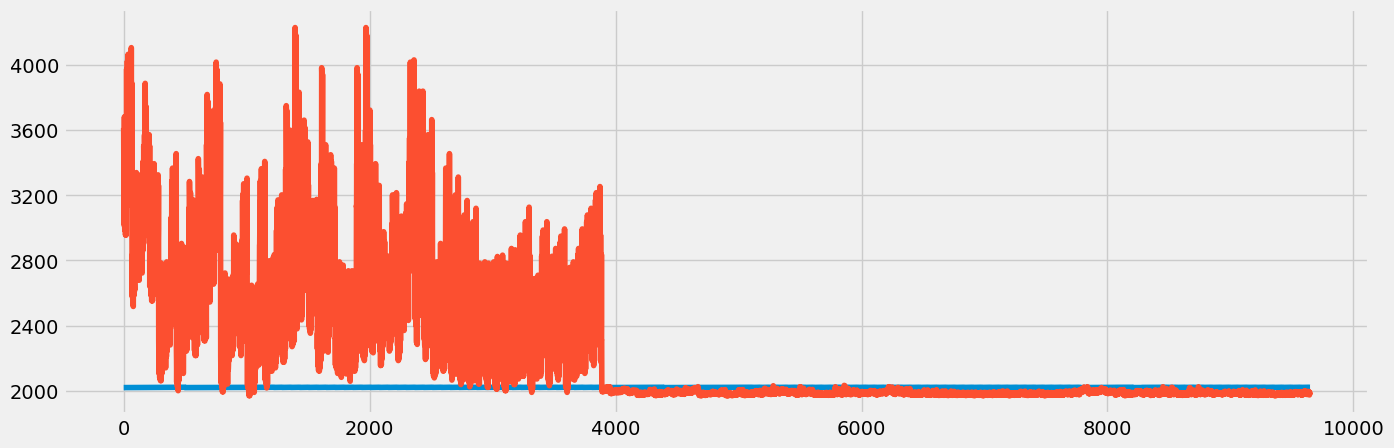

In [14]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(df)

In [15]:
df.head()

,Invoice Date,Total Sales
0,2020-01-01,600000.0
1,2020-01-02,500000.0
2,2020-01-03,400000.0
3,2020-01-04,382500.0
4,2020-01-05,540000.0


### Create a subset from the data.

In [16]:
data_sub = df.loc[(df['Invoice Date'] >= '2020-01-01') & (df['Invoice Date'] < '2021-01-01')]

In [17]:
data_sub.shape

(1302, 2)

In [18]:
data_sub.head()

,Invoice Date,Total Sales
0,2020-01-01,600000.0
1,2020-01-02,500000.0
2,2020-01-03,400000.0
3,2020-01-04,382500.0
4,2020-01-05,540000.0


In [19]:
data_sub.set_index(keys=['Invoice Date'], drop=True, inplace=True)

In [20]:
data_sub.head()

,Total Sales
Invoice Date,
2020-01-01,600000.0
2020-01-02,500000.0
2020-01-03,400000.0
2020-01-04,382500.0
2020-01-05,540000.0


In [21]:
data_sub = data_sub.groupby(by=['Invoice Date']).sum().reset_index()

In [22]:
data_sub.head()

,Invoice Date,Total Sales
0,2020-01-01,845141.0
1,2020-01-02,689410.0
2,2020-01-03,632573.0
3,2020-01-04,615080.0
4,2020-01-05,707829.0


In [23]:
data_sub.set_index(keys=['Invoice Date'], drop=True, inplace=True)

In [24]:
data_sub.head()

,Total Sales
Invoice Date,
2020-01-01,845141.0
2020-01-02,689410.0
2020-01-03,632573.0
2020-01-04,615080.0
2020-01-05,707829.0


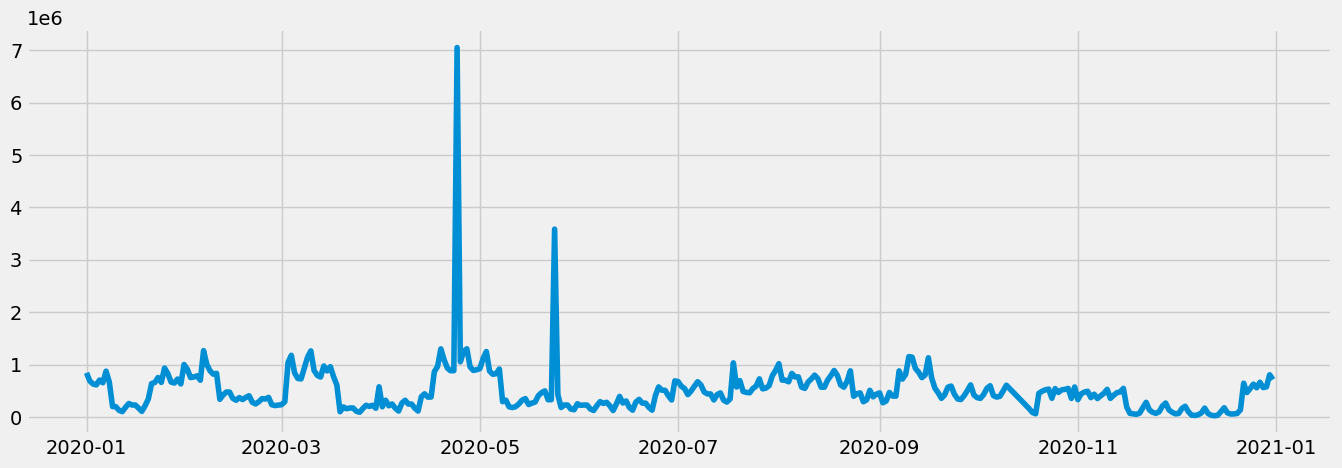

In [25]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

In [26]:
### Sort values
data_sub.sort_values(by='Invoice Date', axis=0, inplace=True)

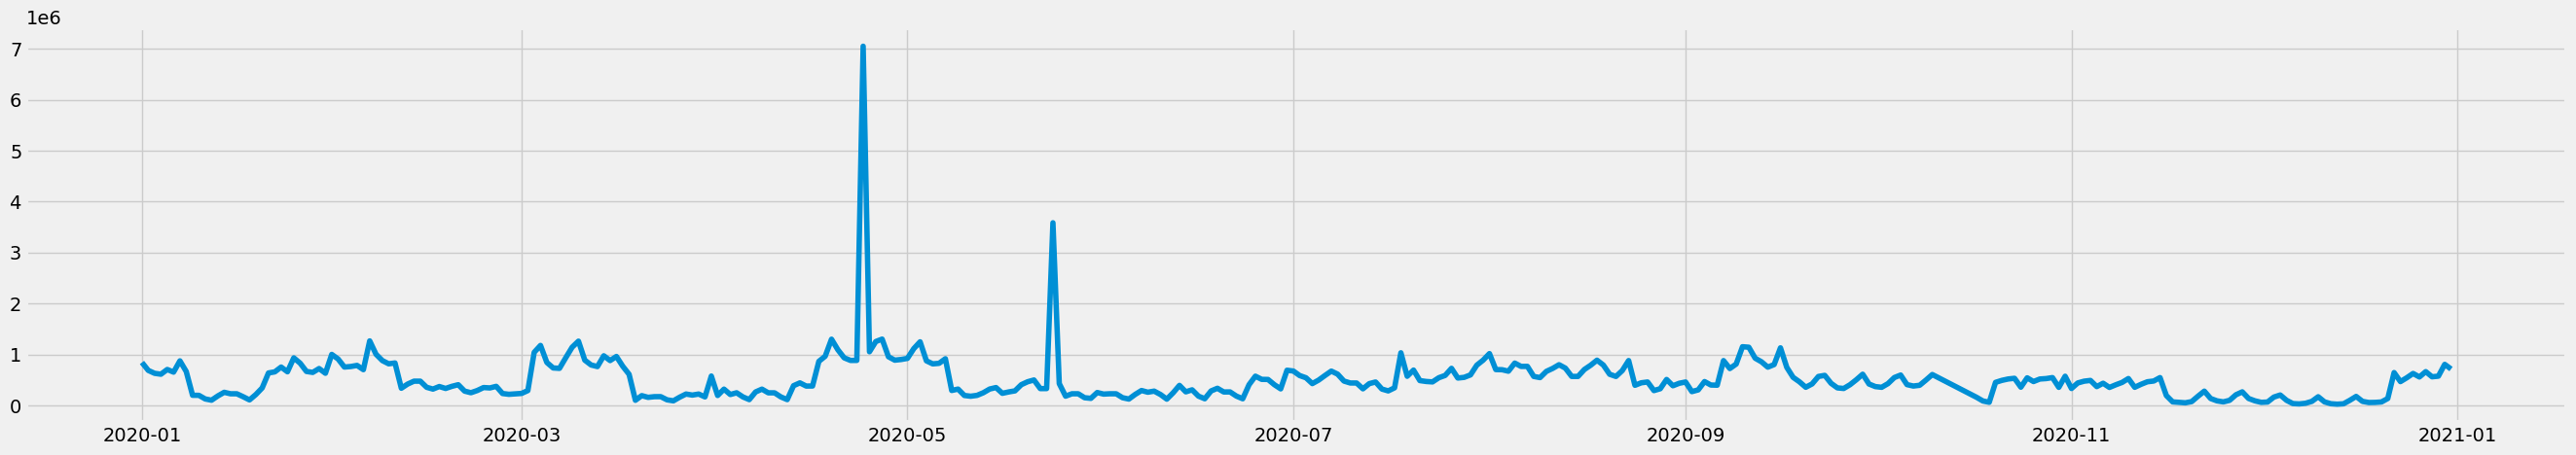

In [27]:
# Plot the data using matplotlib
plt.figure(figsize=(30,5), dpi=100)
plt.plot(data_sub)

### Time-series analysis: decomposition

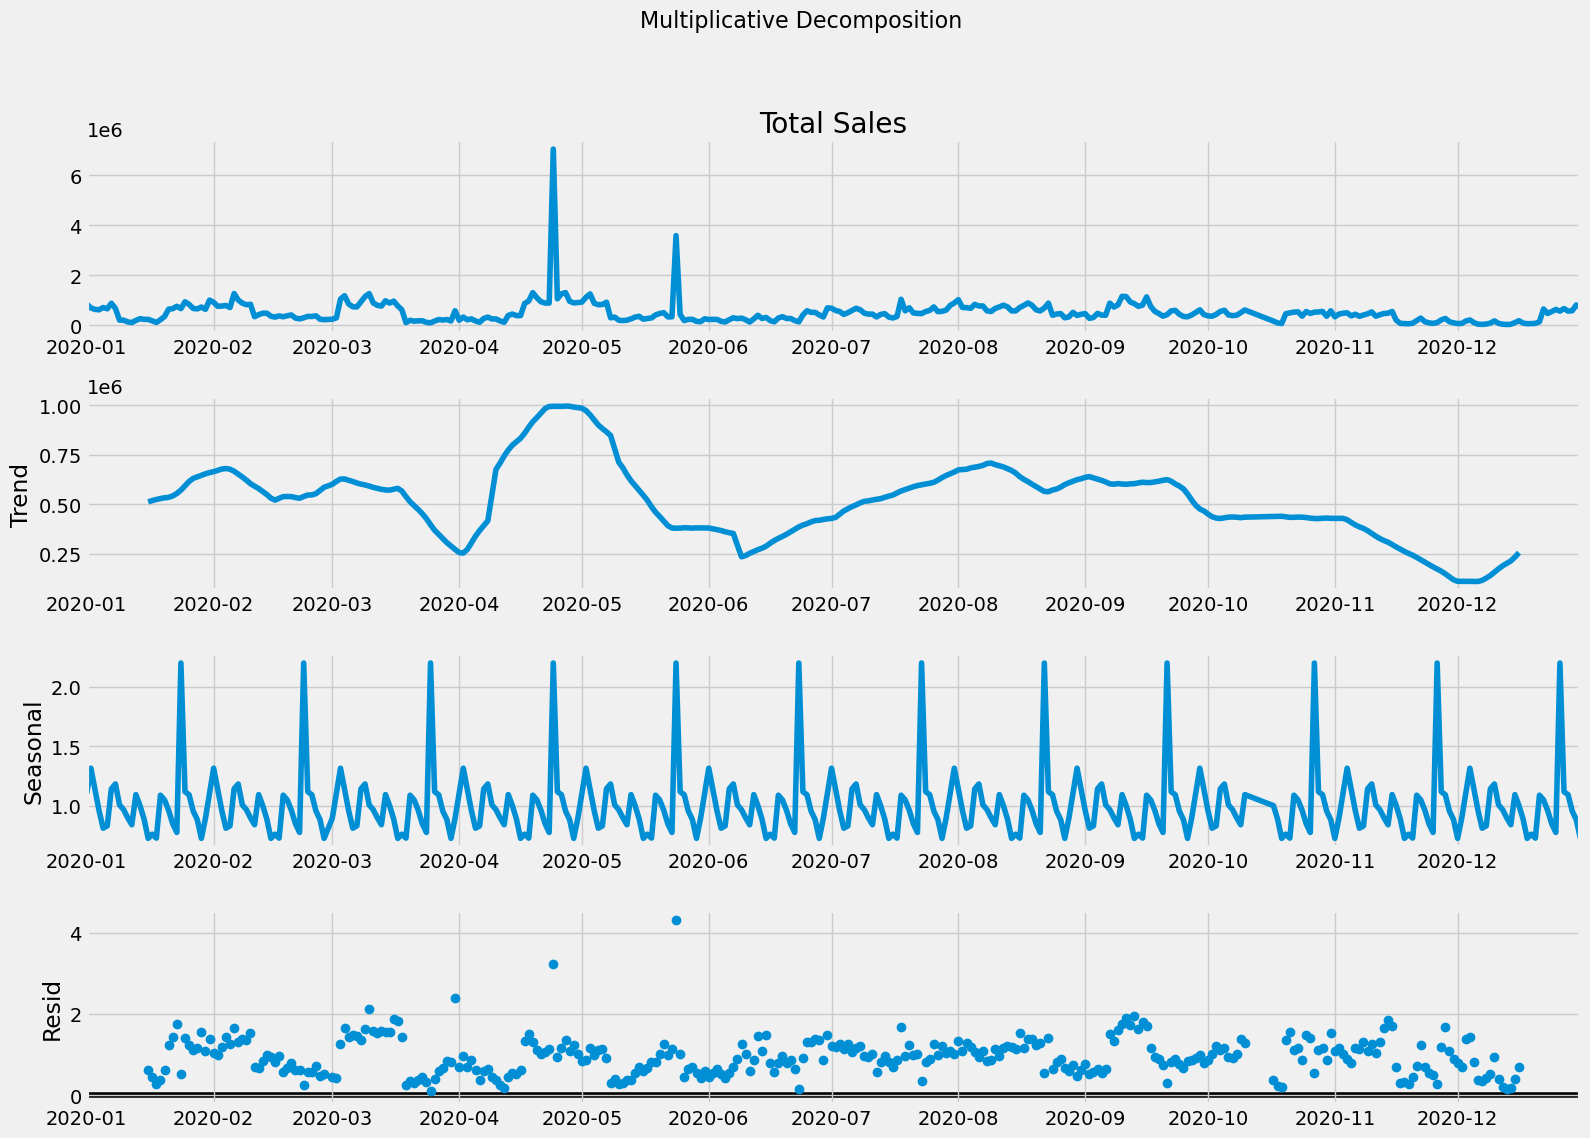

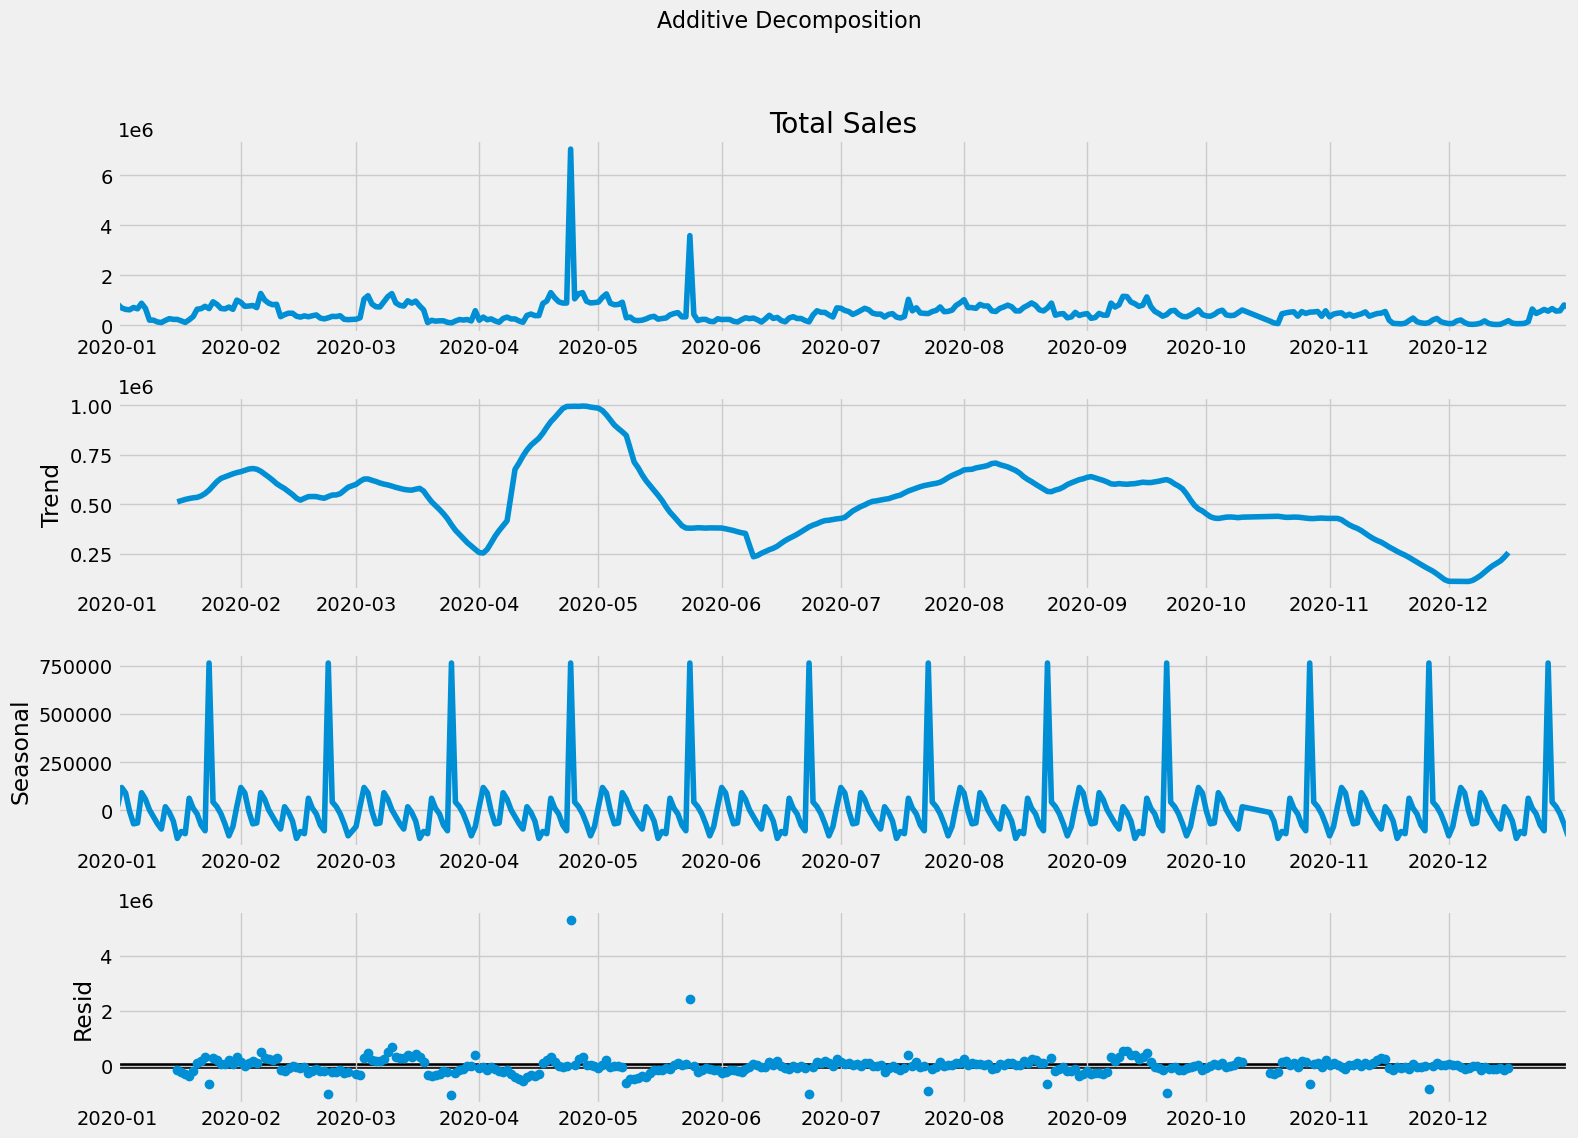

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(data_sub['Total Sales'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(data_sub['Total Sales'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

### Testing for stationarity

In [31]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['Total Sales'])

Dickey-Fuller Stationarity test:
Test Statistic                  -4.758742
p-value                          0.000065
Number of Lags Used              4.000000
Number of Observations Used    354.000000
Critical Value (1%)             -3.448958
Critical Value (5%)             -2.869739
Critical Value (10%)            -2.571138
dtype: float64


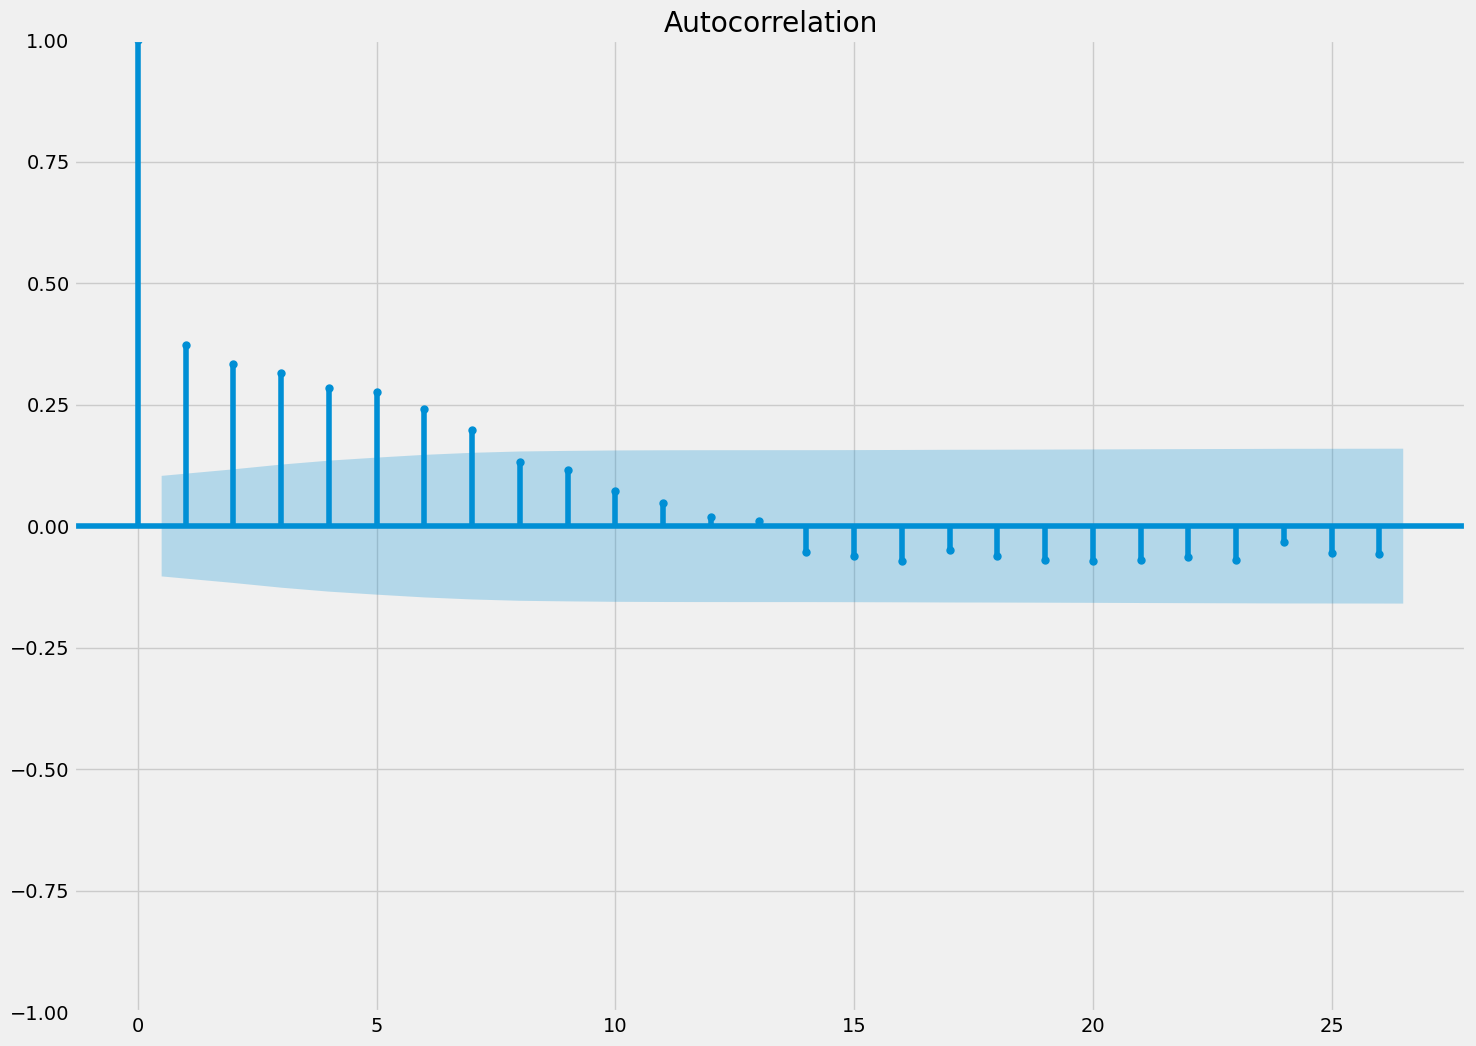

In [32]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_sub)
plt.show()

### Stationarizing the Adidas Sales

In [33]:
data_diff = data_sub - data_sub.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [34]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [35]:
data_diff.head()

,Total Sales
Invoice Date,
2020-01-02,-155731.0
2020-01-03,-56837.0
2020-01-04,-17493.0
2020-01-05,92749.0
2020-01-06,-52079.0


In [36]:
data_diff.columns

Index(['Total Sales'], dtype='object')

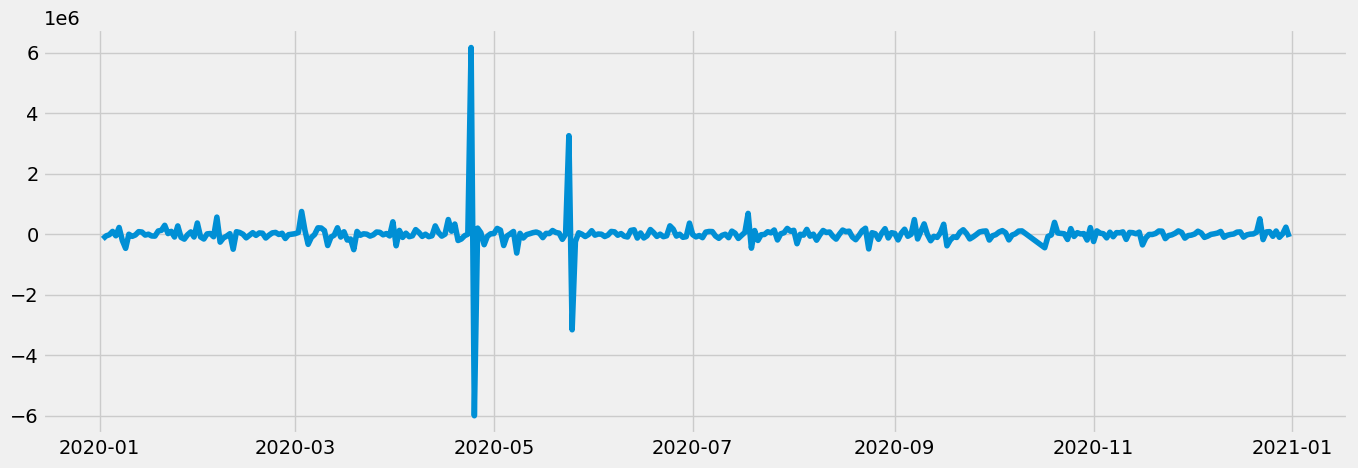

In [37]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [38]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -1.299913e+01
p-value                        2.710496e-24
Number of Lags Used            4.000000e+00
Number of Observations Used    3.530000e+02
Critical Value (1%)           -3.449011e+00
Critical Value (5%)           -2.869763e+00
Critical Value (10%)          -2.571151e+00
dtype: float64


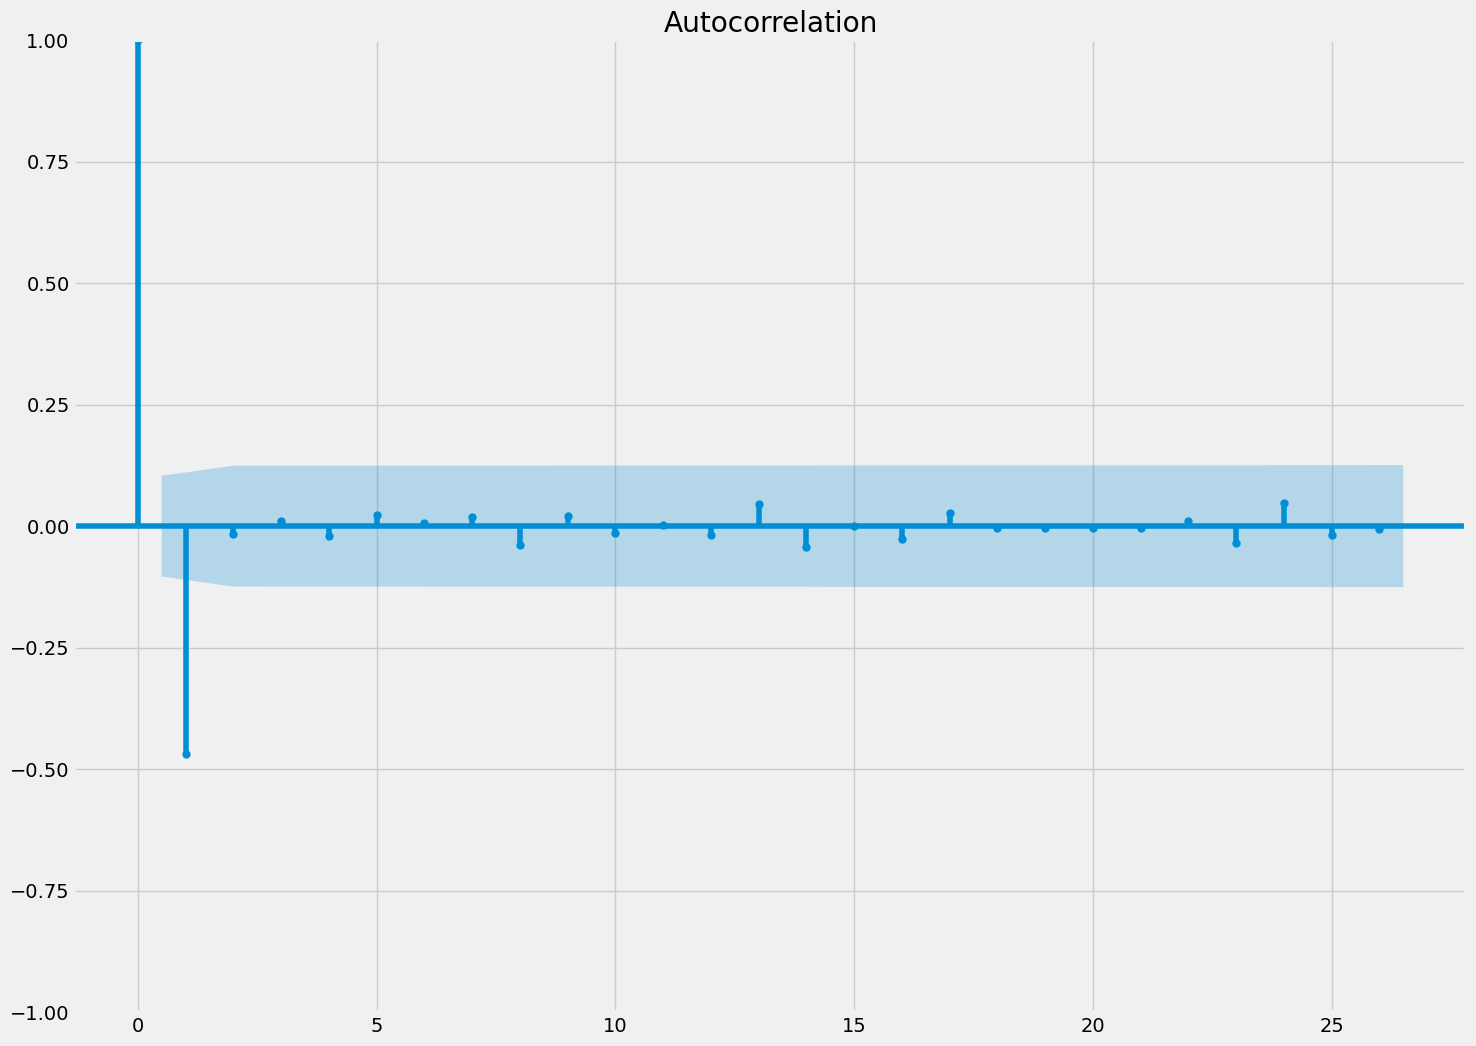

In [39]:
plot_acf(data_diff)
plt.show()

Test Statistis= -4.77 < Critical value=-3.44
The null hypothesis is rejected. the series is stationary.